In [210]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [198]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape((4, )), cmap=plt.cm.Spectral)

In [214]:
class DNN(object):
    def __init__(self, layer_dims, learning_rate=0.01):
        """
        argument:
        layer_dims: a list containing the number of neurons in the respective layers of the network
        learning_rate: a hyperparam used in gradient descent
        """
        self.num_layers = len(layer_dims)
        self.layer_dims = layer_dims
        self.weights = [np.random.randn(x, y)
                       for x, y in zip(layer_dims[:-1], layer_dims[1:])]

        self.biases = [np.random.rand(1, y)
                      for y in layer_dims[1:]]
    
            
        self.learning_rate = 0.01
  
    def _sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))

    def _sigmoid_prime(self, z):
        return self._sigmoid(z) * (1 - self._sigmoid(z))
  
    def feedforward(self, x):
        zs = []
        activations = [x]
        a = x
        
        for w, b in zip(self.weights, self.biases):
            z = np.dot(a, w) + b
            zs.append(z)
            a = self._sigmoid(z)
            activations.append(a)

        self.zs = zs
        self.activations = activations
        return self.activations[-1]
  
    def compute_cost(self, y_hat, y):
        """
        Computes the cross-entropy cost 
        """
        m = y.shape[0] # number of example
        logprobs = np.multiply(np.log(y_hat), y) + np.multiply((1 - y), np.log(1 - y_hat))
        cost = - np.sum(logprobs) / m
        cost = np.squeeze(cost)     # makes sure cost is the dimension we expect.
        return cost
    
        
    def backprop(self, y):
        dW = [np.zeros(w.shape) for w in self.weights]
        db = [np.zeros(b.shape) for b in self.biases]

        delta = (self.activations[-1] - y) * self._sigmoid_prime(self.zs[-1])
        db[-1] = np.squeeze(np.sum(delta, axis=0, keepdims=True))
        dW[-1] = np.dot(self.activations[-2].T, delta)

        for l in xrange(2, self.num_layers):
            z = self.zs[-l]
            delta = np.dot(delta, self.weights[-l+1].T) * self._sigmoid_prime(z)
            db[-l] = np.squeeze(np.sum(delta, axis=0, keepdims=True))
            dW[-l] = np.dot(self.activations[-l-1].T, delta)

        return dW, db
  
    def update_parameters(self, dW, db):
        weights = []
        biases = []
        for w, b, dw, _db in zip(self.weights, self.biases, dW, db):
        
            w = w - self.learning_rate * dw
            b = b - self.learning_rate * _db
            weights.append(w)
            biases.append(b)

        self.weights = weights
        self.biases = biases
    
    def predict(self, data):
        a = self.feedforward(data)
        predictions = np.round(a)

        return predictions

In [215]:
def build_model(X, y, layer_dims, learning_rate=0.01, num_iterations=50000, verbose=True):
    model = DNN(layer_dims=layer_dims, learning_rate=learning_rate)
    cost_history = []
    for i in range(0, num_iterations):
        A2 = model.feedforward(X)
        cost = model.compute_cost(A2, y)
        dW, db = model.backprop(y)
        model.update_parameters(dW, db)
        if i % 1000 == 0 and verbose:
            print ("Iteration %i Cost: %f" % (i, cost))
            
        cost_history.append(cost)
    return model, cost_history

In [216]:
X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
y = np.array([[0,1,1,0]]).T

Iteration 0 Cost: 0.701986
Iteration 1000 Cost: 0.693003
Iteration 2000 Cost: 0.692945
Iteration 3000 Cost: 0.692891
Iteration 4000 Cost: 0.692842
Iteration 5000 Cost: 0.692795
Iteration 6000 Cost: 0.692751
Iteration 7000 Cost: 0.692708
Iteration 8000 Cost: 0.692666
Iteration 9000 Cost: 0.692625
Iteration 10000 Cost: 0.692584
Iteration 11000 Cost: 0.692542
Iteration 12000 Cost: 0.692500
Iteration 13000 Cost: 0.692457
Iteration 14000 Cost: 0.692412
Iteration 15000 Cost: 0.692365
Iteration 16000 Cost: 0.692317
Iteration 17000 Cost: 0.692266
Iteration 18000 Cost: 0.692212
Iteration 19000 Cost: 0.692155
Iteration 20000 Cost: 0.692094
Iteration 21000 Cost: 0.692029
Iteration 22000 Cost: 0.691960
Iteration 23000 Cost: 0.691885
Iteration 24000 Cost: 0.691805
Iteration 25000 Cost: 0.691718
Iteration 26000 Cost: 0.691624
Iteration 27000 Cost: 0.691521
Iteration 28000 Cost: 0.691409
Iteration 29000 Cost: 0.691287
Iteration 30000 Cost: 0.691153
Iteration 31000 Cost: 0.691005
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 2 hidden layers neurons')

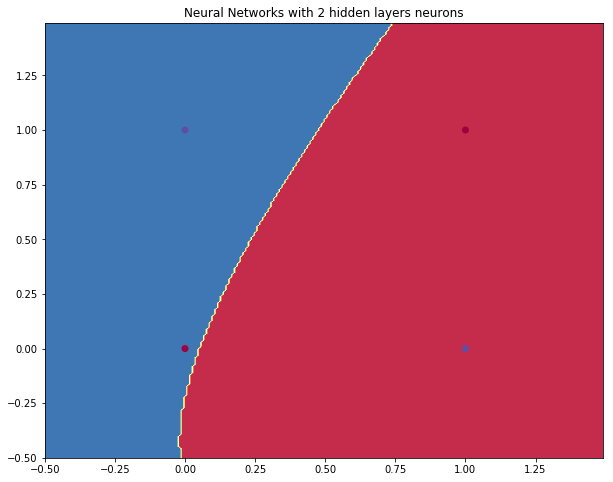

In [217]:
model, cost_history = build_model(X, y, [2, 3, 3, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 2 hidden layers neurons")

Iteration 0 Cost: 0.716862
Iteration 1000 Cost: 0.693410
Iteration 2000 Cost: 0.693070
Iteration 3000 Cost: 0.692786
Iteration 4000 Cost: 0.692546
Iteration 5000 Cost: 0.692338
Iteration 6000 Cost: 0.692153
Iteration 7000 Cost: 0.691986
Iteration 8000 Cost: 0.691829
Iteration 9000 Cost: 0.691679
Iteration 10000 Cost: 0.691530
Iteration 11000 Cost: 0.691380
Iteration 12000 Cost: 0.691225
Iteration 13000 Cost: 0.691062
Iteration 14000 Cost: 0.690887
Iteration 15000 Cost: 0.690697
Iteration 16000 Cost: 0.690490
Iteration 17000 Cost: 0.690260
Iteration 18000 Cost: 0.690003
Iteration 19000 Cost: 0.689714
Iteration 20000 Cost: 0.689387
Iteration 21000 Cost: 0.689013
Iteration 22000 Cost: 0.688582
Iteration 23000 Cost: 0.688083
Iteration 24000 Cost: 0.687500
Iteration 25000 Cost: 0.686812
Iteration 26000 Cost: 0.685994
Iteration 27000 Cost: 0.685013
Iteration 28000 Cost: 0.683823
Iteration 29000 Cost: 0.682368
Iteration 30000 Cost: 0.680568
Iteration 31000 Cost: 0.678318
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 3 hidden layers neurons')

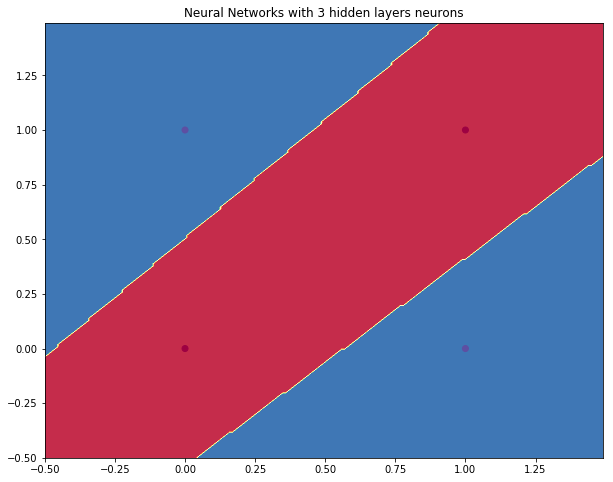

In [218]:
model, cost_history = build_model(X, y, [2, 3, 3, 3, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 3 hidden layers neurons")

Iteration 0 Cost: 0.690011
Iteration 1000 Cost: 0.687886
Iteration 2000 Cost: 0.685081
Iteration 3000 Cost: 0.681189
Iteration 4000 Cost: 0.675844
Iteration 5000 Cost: 0.668943
Iteration 6000 Cost: 0.660551
Iteration 7000 Cost: 0.650427
Iteration 8000 Cost: 0.638150
Iteration 9000 Cost: 0.623539
Iteration 10000 Cost: 0.606742
Iteration 11000 Cost: 0.588103
Iteration 12000 Cost: 0.567892
Iteration 13000 Cost: 0.545983
Iteration 14000 Cost: 0.521617
Iteration 15000 Cost: 0.493383
Iteration 16000 Cost: 0.459641
Iteration 17000 Cost: 0.419721
Iteration 18000 Cost: 0.375369
Iteration 19000 Cost: 0.330622
Iteration 20000 Cost: 0.289577
Iteration 21000 Cost: 0.254426
Iteration 22000 Cost: 0.225411
Iteration 23000 Cost: 0.201764
Iteration 24000 Cost: 0.182473
Iteration 25000 Cost: 0.166614
Iteration 26000 Cost: 0.153443
Iteration 27000 Cost: 0.142382
Iteration 28000 Cost: 0.132990
Iteration 29000 Cost: 0.124931
Iteration 30000 Cost: 0.117947
Iteration 31000 Cost: 0.111841
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 2 hidden layers neurons')

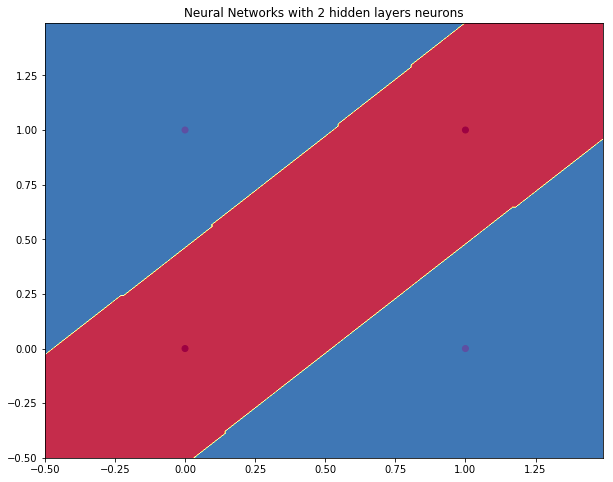

In [219]:
model, cost_history = build_model(X, y, [2, 5, 5, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 2 hidden layers neurons")

Iteration 0 Cost: 1.028033
Iteration 1000 Cost: 0.687700
Iteration 2000 Cost: 0.682116
Iteration 3000 Cost: 0.674516
Iteration 4000 Cost: 0.664335
Iteration 5000 Cost: 0.651776
Iteration 6000 Cost: 0.637367
Iteration 7000 Cost: 0.621206
Iteration 8000 Cost: 0.602969
Iteration 9000 Cost: 0.582257
Iteration 10000 Cost: 0.558790
Iteration 11000 Cost: 0.532433
Iteration 12000 Cost: 0.503194
Iteration 13000 Cost: 0.471317
Iteration 14000 Cost: 0.437485
Iteration 15000 Cost: 0.402928
Iteration 16000 Cost: 0.369119
Iteration 17000 Cost: 0.337273
Iteration 18000 Cost: 0.308112
Iteration 19000 Cost: 0.281918
Iteration 20000 Cost: 0.258680
Iteration 21000 Cost: 0.238216
Iteration 22000 Cost: 0.220262
Iteration 23000 Cost: 0.204522
Iteration 24000 Cost: 0.190710
Iteration 25000 Cost: 0.178558
Iteration 26000 Cost: 0.167832
Iteration 27000 Cost: 0.158326
Iteration 28000 Cost: 0.149866
Iteration 29000 Cost: 0.142304
Iteration 30000 Cost: 0.135515
Iteration 31000 Cost: 0.129394
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 2 hidden layers neurons')

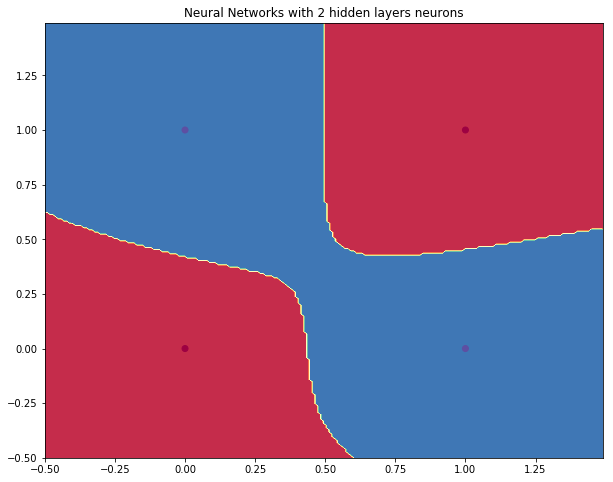

In [220]:
model, cost_history = build_model(X, y, [2, 5, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 2 hidden layers neurons")

Iteration 0 Cost: 0.779131
Iteration 1000 Cost: 0.693641
Iteration 2000 Cost: 0.693142
Iteration 3000 Cost: 0.692652
Iteration 4000 Cost: 0.692153
Iteration 5000 Cost: 0.691628
Iteration 6000 Cost: 0.691059
Iteration 7000 Cost: 0.690425
Iteration 8000 Cost: 0.689704
Iteration 9000 Cost: 0.688864
Iteration 10000 Cost: 0.687868
Iteration 11000 Cost: 0.686665
Iteration 12000 Cost: 0.685186
Iteration 13000 Cost: 0.683333
Iteration 14000 Cost: 0.680963
Iteration 15000 Cost: 0.677865
Iteration 16000 Cost: 0.673721
Iteration 17000 Cost: 0.668044
Iteration 18000 Cost: 0.660081
Iteration 19000 Cost: 0.648655
Iteration 20000 Cost: 0.631848
Iteration 21000 Cost: 0.606438
Iteration 22000 Cost: 0.567125
Iteration 23000 Cost: 0.506904
Iteration 24000 Cost: 0.423201
Iteration 25000 Cost: 0.329816
Iteration 26000 Cost: 0.250237
Iteration 27000 Cost: 0.193800
Iteration 28000 Cost: 0.156034
Iteration 29000 Cost: 0.130379
Iteration 30000 Cost: 0.112260
Iteration 31000 Cost: 0.098928
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 3 hidden layers neurons')

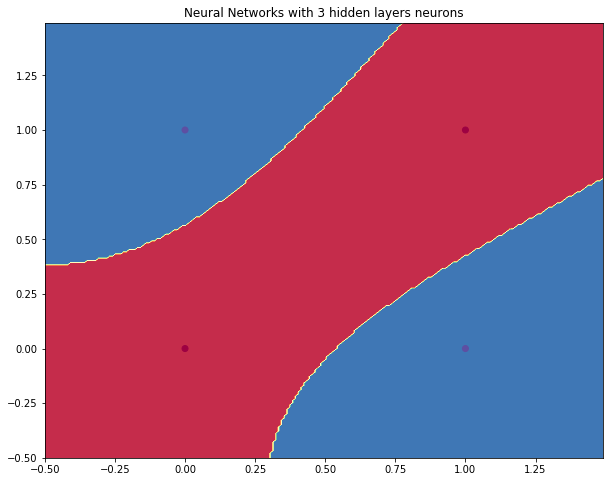

In [222]:
model, cost_history = build_model(X, y, [2, 5, 5, 5, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 3 hidden layers neurons")

Iteration 0 Cost: 0.929881
Iteration 1000 Cost: 0.696725
Iteration 2000 Cost: 0.696257
Iteration 3000 Cost: 0.695858
Iteration 4000 Cost: 0.695513
Iteration 5000 Cost: 0.695212
Iteration 6000 Cost: 0.694945
Iteration 7000 Cost: 0.694707
Iteration 8000 Cost: 0.694491
Iteration 9000 Cost: 0.694294
Iteration 10000 Cost: 0.694112
Iteration 11000 Cost: 0.693942
Iteration 12000 Cost: 0.693782
Iteration 13000 Cost: 0.693630
Iteration 14000 Cost: 0.693484
Iteration 15000 Cost: 0.693341
Iteration 16000 Cost: 0.693202
Iteration 17000 Cost: 0.693064
Iteration 18000 Cost: 0.692926
Iteration 19000 Cost: 0.692787
Iteration 20000 Cost: 0.692645
Iteration 21000 Cost: 0.692500
Iteration 22000 Cost: 0.692349
Iteration 23000 Cost: 0.692192
Iteration 24000 Cost: 0.692026
Iteration 25000 Cost: 0.691851
Iteration 26000 Cost: 0.691663
Iteration 27000 Cost: 0.691462
Iteration 28000 Cost: 0.691244
Iteration 29000 Cost: 0.691007
Iteration 30000 Cost: 0.690748
Iteration 31000 Cost: 0.690463
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 2 hidden layers neurons')

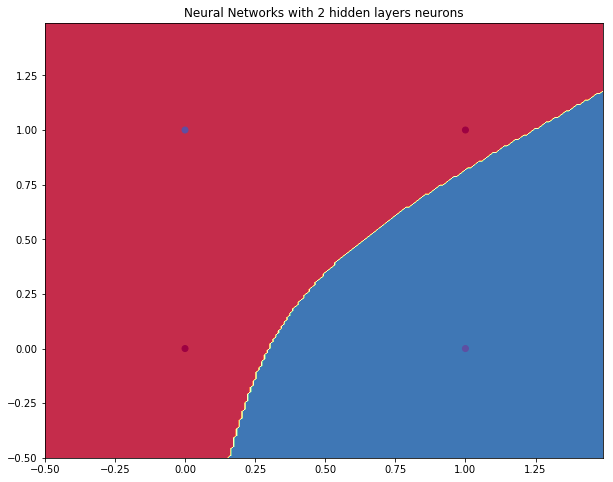

In [223]:
model, cost_history = build_model(X, y, [2, 5, 5, 5, 1])
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 2 hidden layers neurons")